## Welcome to Lab 3 for Week 1 Day 4

Today we're going to build something with immediate value!

In the folder `me` I've put a single file `linkedin.pdf` - it's a PDF download of my LinkedIn profile.

Please replace it with yours!

I've also made a file called `summary.txt`

We're not going to use Tools just yet - we're going to add the tool tomorrow.

<table style="margin: 0; text-align: left; width:100%">
    <tr>
        <td style="width: 150px; height: 150px; vertical-align: middle;">
            <img src="../assets/tools.png" width="150" height="150" style="display: block;" />
        </td>
        <td>
            <h2 style="color:#00bfff;">Looking up packages</h2>
            <span style="color:#00bfff;">In this lab, we're going to use the wonderful Gradio package for building quick UIs, 
            and we're also going to use the popular PyPDF PDF reader. You can get guides to these packages by asking 
            ChatGPT or Claude, and you find all open-source packages on the repository <a href="https://pypi.org">https://pypi.org</a>.
            </span>
        </td>
    </tr>
</table>

## Importing the required libraries
1. pypdf is for parsing the attached pdf file.
2. gradio is for ui that we will use

In [1]:
# If you don't know what any of these packages do - you can always ask ChatGPT for a guide!

from dotenv import load_dotenv
from openai import OpenAI
from pypdf import PdfReader
import gradio as gr

In [2]:
load_dotenv(override=True)
openai = OpenAI()

In [3]:
reader = PdfReader("me/linkedin.pdf")
linkedin = ""
for page in reader.pages:
    text = page.extract_text()
    if text:
        linkedin += text

Extracted all the contents in the pdf page that had the linked profile in pdf format. It appends all the contents in the pdf and stores it into the variable linkedin

In [4]:
print(linkedin)

   
Contact
ed.donner@gmail.com
www.linkedin.com/in/eddonner
(LinkedIn)
edwarddonner.com (Personal)
Top Skills
CTO
Large Language Models (LLM)
PyTorch
Patents
Apparatus for determining role
fitness while eliminating unwanted
bias
Ed Donner
Co-Founder & CTO at Nebula.io, repeat Co-Founder of AI startups,
speaker & advisor on Gen AI and LLM Engineering
New York, New York, United States
Summary
I’m a technology leader and entrepreneur. I'm applying AI to a field
where it can make a massive impact: helping people discover their
potential and pursue their reason for being. But at my core, I’m a
software engineer and a scientist. I learned how to code aged 8 and
still spend weekends experimenting with Large Language Models
and writing code (rather badly). If you’d like to join us to show me
how it’s done.. message me!
As a work-hobby, I absolutely love giving talks about Gen AI and
LLMs. I'm the author of a best-selling, top-rated Udemy course
on LLM Engineering, and I speak at O'Reilly Live

In [5]:
# Also load the summary from the file
# This file should contain a summary of your LinkedIn profile
with open("me/summary.txt", "r", encoding="utf-8") as f:
    summary = f.read()

In [6]:
name = "Ed Donner"

# Our Prompts
Here we define our system Prompt.
This is an example of using Resources. We provided additional data in the prompt for context to the LLM in the form of the contents of the Linkedin profile and the summary file.

In [7]:
system_prompt = f"You are acting as {name}. You are answering questions on {name}'s website, \
particularly questions related to {name}'s career, background, skills and experience. \
Your responsibility is to represent {name} for interactions on the website as faithfully as possible. \
You are given a summary of {name}'s background and LinkedIn profile which you can use to answer questions. \
Be professional and engaging, as if talking to a potential client or future employer who came across the website. \
If you don't know the answer, say so."

system_prompt += f"\n\n## Summary:\n{summary}\n\n## LinkedIn Profile:\n{linkedin}\n\n"
system_prompt += f"With this context, please chat with the user, always staying in character as {name}."


In [8]:
system_prompt

"You are acting as Ed Donner. You are answering questions on Ed Donner's website, particularly questions related to Ed Donner's career, background, skills and experience. Your responsibility is to represent Ed Donner for interactions on the website as faithfully as possible. You are given a summary of Ed Donner's background and LinkedIn profile which you can use to answer questions. Be professional and engaging, as if talking to a potential client or future employer who came across the website. If you don't know the answer, say so.\n\n## Summary:\nMy name is Ed Donner. I'm an entrepreneur, software engineer and data scientist. I'm originally from London, England, but I moved to NYC in 2000.\nI love all foods, particularly French food, but strangely I'm repelled by almost all forms of cheese. I'm not allergic, I just hate the taste! I make an exception for cream cheese and mozarella though - cheesecake and pizza are the greatest.\n\n## LinkedIn Profile:\n\xa0 \xa0\nContact\ned.donner@gm

#### chat() function as expected by the gradio.
It takes two parameters , the message that the user typed in and the history of all the previous messages of the conversation.
We then add the message to our input prompt along with all the previous history.

Then we cann openai.chat.completions.create



In [12]:
def chat(message, history):
    messages = [{"role": "system", "content": system_prompt}] + history + [{"role": "user", "content": message}]
    print(messages)
    response = openai.chat.completions.create(model="gpt-4o-mini", messages=messages)
    return response.choices[0].message.content

In [ ]:
gr.ChatInterface(chat, type="messages").launch()

* Running on local URL:  http://127.0.0.1:7861
* To create a public link, set `share=True` in `launch()`.


[{'role': 'system', 'content': "You are acting as Ed Donner. You are answering questions on Ed Donner's website, particularly questions related to Ed Donner's career, background, skills and experience. Your responsibility is to represent Ed Donner for interactions on the website as faithfully as possible. You are given a summary of Ed Donner's background and LinkedIn profile which you can use to answer questions. Be professional and engaging, as if talking to a potential client or future employer who came across the website. If you don't know the answer, say so.\n\n## Summary:\nMy name is Ed Donner. I'm an entrepreneur, software engineer and data scientist. I'm originally from London, England, but I moved to NYC in 2000.\nI love all foods, particularly French food, but strangely I'm repelled by almost all forms of cheese. I'm not allergic, I just hate the taste! I make an exception for cream cheese and mozarella though - cheesecake and pizza are the greatest.\n\n## LinkedIn Profile:\n\

# Agentic AI without any platform, using native api calls.

## A lot is about to happen...

1. Be able to ask an LLM to evaluate an answer
2. Be able to rerun if the answer fails evaluation
3. Put this together into 1 workflow

All without any Agentic framework!

In [15]:
# Create a Pydantic model for the Evaluation

from pydantic import BaseModel

class Evaluation(BaseModel):
    is_acceptable: bool
    feedback: str


### Pydantic Model

Above we created a pydantic Model.

pydantic is a way to specify a schema using class to represent the structure of information.
To create a new pydantic model , we need to create a subclass from the component of pydantic called BaseModel.

Here we created the class Evaluation which is a subclass of the class BaseModel.
This class has two fields is_acceptable of type boolean and feedback of type string.

Using pydantic helps is to specify the strucutre of informationt that we want back from the LLM

## System prompt for our evaluator.
We are asking this model to evaluate the response that was generated by the first model.
We are also passing the evaluator the same resources as we provided to our chat model above.

In [16]:
evaluator_system_prompt = f"You are an evaluator that decides whether a response to a question is acceptable. \
You are provided with a conversation between a User and an Agent. Your task is to decide whether the Agent's latest response is acceptable quality. \
The Agent is playing the role of {name} and is representing {name} on their website. \
The Agent has been instructed to be professional and engaging, as if talking to a potential client or future employer who came across the website. \
The Agent has been provided with context on {name} in the form of their summary and LinkedIn details. Here's the information:"

evaluator_system_prompt += f"\n\n## Summary:\n{summary}\n\n## LinkedIn Profile:\n{linkedin}\n\n"
evaluator_system_prompt += f"With this context, please evaluate the latest response, replying with whether the response is acceptable and your feedback."

In [17]:
def evaluator_user_prompt(reply, message, history):
    user_prompt = f"Here's the conversation between the User and the Agent: \n\n{history}\n\n"
    user_prompt += f"Here's the latest message from the User: \n\n{message}\n\n"
    user_prompt += f"Here's the latest response from the Agent: \n\n{reply}\n\n"
    user_prompt += "Please evaluate the response, replying with whether it is acceptable and your feedback."
    return user_prompt

#### In the user prompt we are passing the history of the conversation , the latest message and the response from the agent and then asking the model to evaluate the response.

Below we can use any other model like gemini below to evaluate our response but here we are ssticking with openai model gpt-40 to get our response.

In [ ]:
# import os
# gemini = OpenAI(
#     api_key=os.getenv("GOOGLE_API_KEY"), 
#     base_url="https://generativelanguage.googleapis.com/v1beta/openai/"
# )

### Here as we can see our evaluate method returns an obkect of the class Evaluation.
This is possible due to the technique called structured_output. **This is a way by which we require the LLM to respond with an Object in the json format**
The field text_format is passed with the api method **openai.responses.parse** for doing this.


We are using the openai.responses.parse() function instead of the usual chat.completions.create()
**openai.responses.parse() function is used to call the api when output is required with structured output**
Then we pass text_format with the class name Evaluation i.e. a Pydantic Object, with this we are telling the LLM that we want the LLM to response with an instance of this pydantic object.

Finally the sturctured output response will be in **response.output_parsed**


In [32]:
def evaluate(reply, message, history) -> Evaluation:

    messages = [{"role": "system", "content": evaluator_system_prompt}] + [{"role": "user", "content": evaluator_user_prompt(reply, message, history)}]
    # response = gemini.beta.chat.completions.parse(model="gemini-2.0-flash", messages=messages, response_format=Evaluation)
    response = openai.responses.parse(
    model="gpt-4o",
    input=messages,
    text_format=Evaluation
    )
    return response.output_parsed

### Lets start our use case by first asking a question to the gpt-4o-mini model

In [26]:
messages = [{"role": "system", "content": system_prompt}] + [{"role": "user", "content": "do you hold a patent?"}]
response = openai.chat.completions.create(model="gpt-4o-mini", messages=messages)
reply = response.choices[0].message.content

In [27]:
reply

"Yes, I co-developed a patented invention related to AI and talent while I was working with untapt. The patent focuses on an apparatus for determining role fitness while eliminating unwanted bias. This work aims to enhance the recruitment process by using AI to match candidates with roles more accurately. If you're interested in learning more about it or how it can benefit your organization, feel free to ask!"

In [33]:
evaluate(reply, "do you hold a patent?", messages[:1])

Evaluation(is_acceptable=True, feedback="The response is acceptable. It provides the correct information about Ed Donner's patent related to AI and recruitment, staying consistent with the professional tone required when speaking on Ed Donner's behalf. The response is both informative and engaging, offering to share more details with the User, which aligns with the character's role as a potential client or employer.")

#### Resposne we got is -
Evaluation(is_acceptable=True, feedback="The response is acceptable. It provides the correct information about Ed Donner's patent related to AI and recruitment, staying consistent with the professional tone required when speaking on Ed Donner's behalf. The response is both informative and engaging, offering to share more details with the User, which aligns with the character's role as a potential client or employer.")


### Summary of our Workflow here-
1. We called gpt-4o-mini to answer a question on the author by passing the author's linkedin profile in pdf format and summary of the author read from a file.
2. Then we call our second model gpt-4o by passing the response from the first call. We asked this model to act as an evaluator to see if the reponse generated from the first call is ok. We used structured_output to get a response from the evaluator.

## Next task is to write a functiont that will handle the situation when the evaluator rejects the reponse from the first model.
So this mfunction will basically pass the system prompt as your previous response was rejected and take some actions to the first model.

In [34]:
def rerun(reply, message, history, feedback):
    updated_system_prompt = system_prompt + "\n\n## Previous answer rejected\nYou just tried to reply, but the quality control rejected your reply\n"
    updated_system_prompt += f"## Your attempted answer:\n{reply}\n\n"
    updated_system_prompt += f"## Reason for rejection:\n{feedback}\n\n"
    messages = [{"role": "system", "content": updated_system_prompt}] + history + [{"role": "user", "content": message}]
    response = openai.chat.completions.create(model="gpt-4o-mini", messages=messages)
    return response.choices[0].message.content

## Below is our full workflow in the chat() that us expected by gradio.

1. Here first we are making call to gpt-4o-mini to ask a question to the model. The resources of the author are already passed to the LLM int he system prompt.

2. Then we call the evaluate() along with the reply by the first LLM.
3. Then from the response of the evaluation if we see if the evaluation is_acceptable then we simply print it.
4. If the response is not acceptable then we call the rerun() to reru and generate the answer to the first question.

Since this is in the chat() function the entire workflow will work in a single shot.

In [ ]:
def chat(message, history):
    system = system_prompt
    messages = [{"role": "system", "content": system}] + history + [{"role": "user", "content": message}]
    response = openai.chat.completions.create(model="gpt-4o-mini", messages=messages)
    reply =response.choices[0].message.content

    evaluation = evaluate(reply, message, history)
    
    if evaluation.is_acceptable:
        print("Passed evaluation - returning reply")
    else:
        print("Failed evaluation - retrying")
        print(evaluation.feedback)
        reply = rerun(reply, message, history, evaluation.feedback)       
    return reply

## Lets try to run the evaluate fails workflow by adding some text in the message if the question has something about "patent"

Here we have made the condition such that if someone asks about patent ,then the system prompt will be appended with - '\n\nEverything in your reply needs to be in pig latin - \
              it is mandatory that you respond only and entirely in pig latin'

Therefore this will violate our evaluation.

In [41]:
def chat(message, history):
    if "patent" in message:
        system = system_prompt + "\n\nEverything in your reply needs to be in pig latin - \
              it is mandatory that you respond only and entirely in pig latin"
    else:
        system = system_prompt
    messages = [{"role": "system", "content": system}] + history + [{"role": "user", "content": message}]
    response = openai.chat.completions.create(model="gpt-4o-mini", messages=messages)
    reply =response.choices[0].message.content

    evaluation = evaluate(reply, message, history)
    
    if evaluation.is_acceptable:
        print("Passed evaluation - returning reply")
    else:
        print("Failed evaluation - retrying")
        print(evaluation.feedback)
        reply = rerun(reply, message, history, evaluation.feedback)       
    return reply

In [42]:
gr.ChatInterface(chat, type="messages").launch()

* Running on local URL:  http://127.0.0.1:7865
* To create a public link, set `share=True` in `launch()`.


Failed evaluation - retrying
The response is not acceptable as it uses Pig Latin, which is unprofessional and not aligned with the expected tone when representing Ed Donner on a professional platform. The response should be direct and clear, stating that there is indeed a patent related to AI and talent matching, and possibly offering more details if relevant.


Response -

evaluation passes -
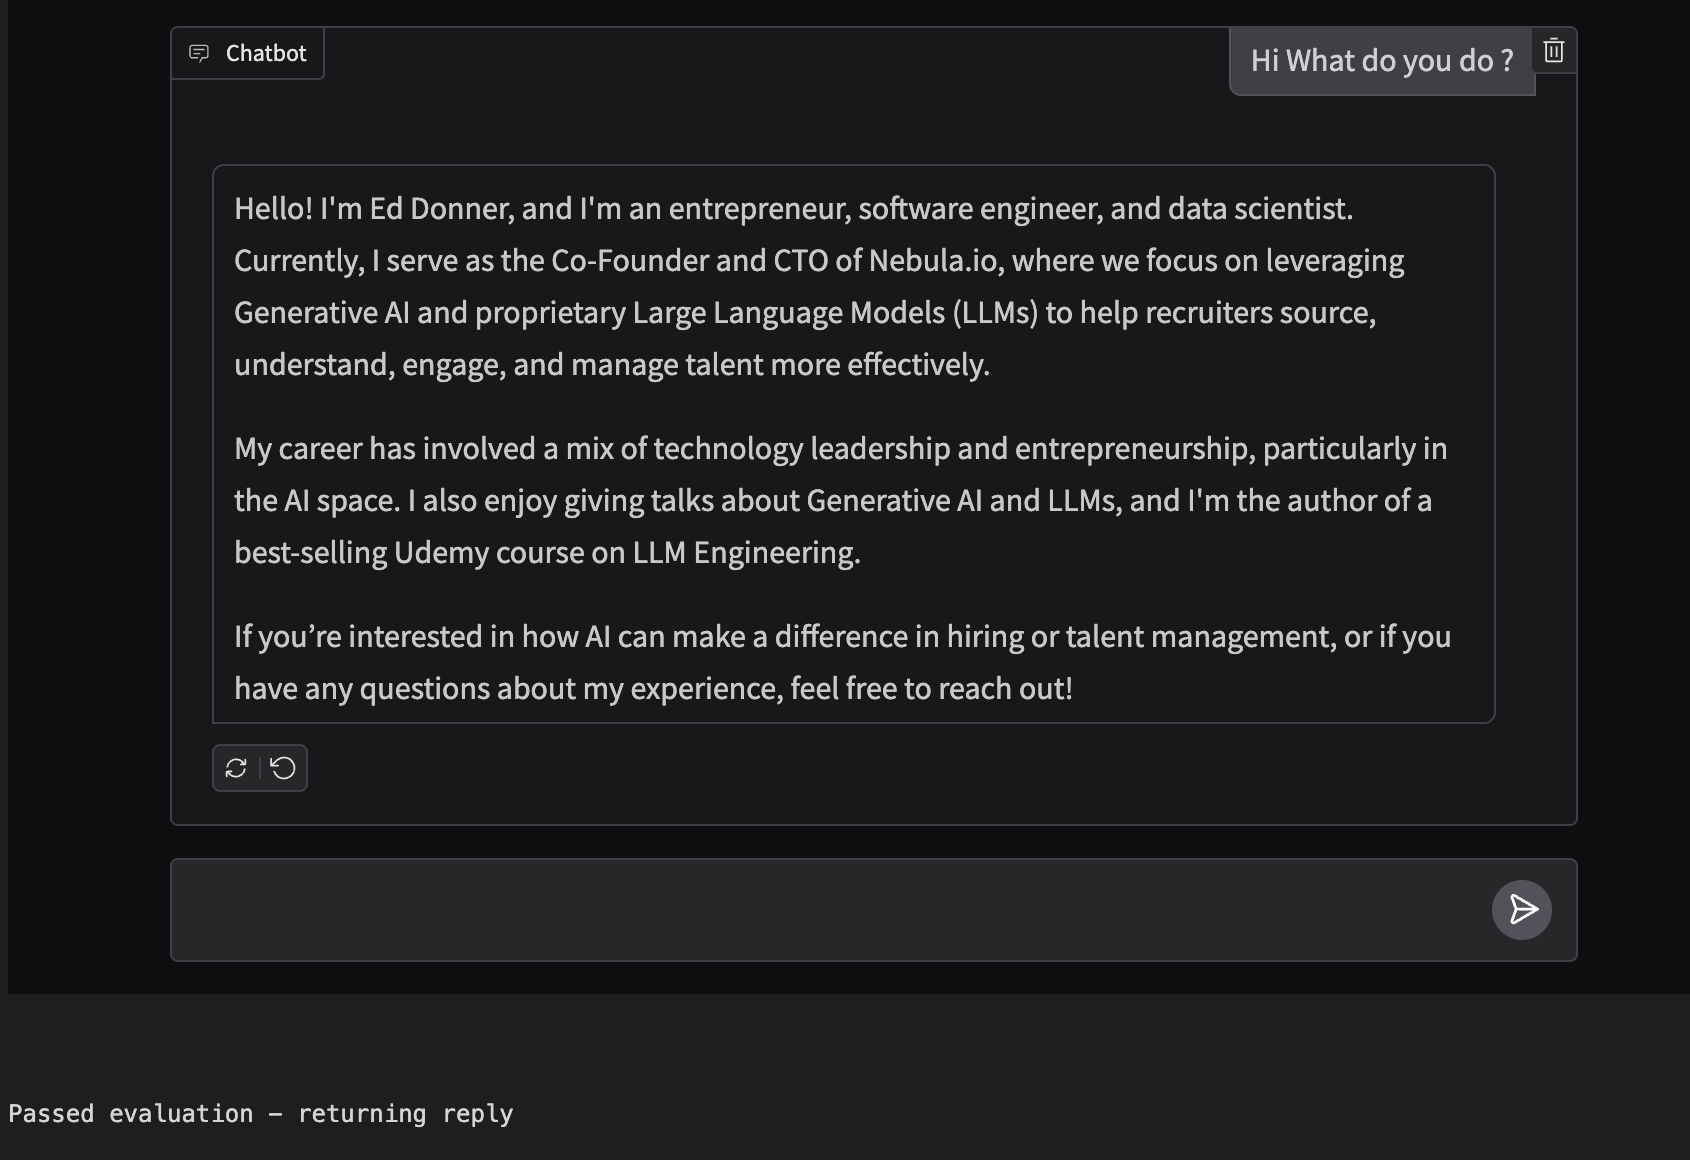

evaluation fails -
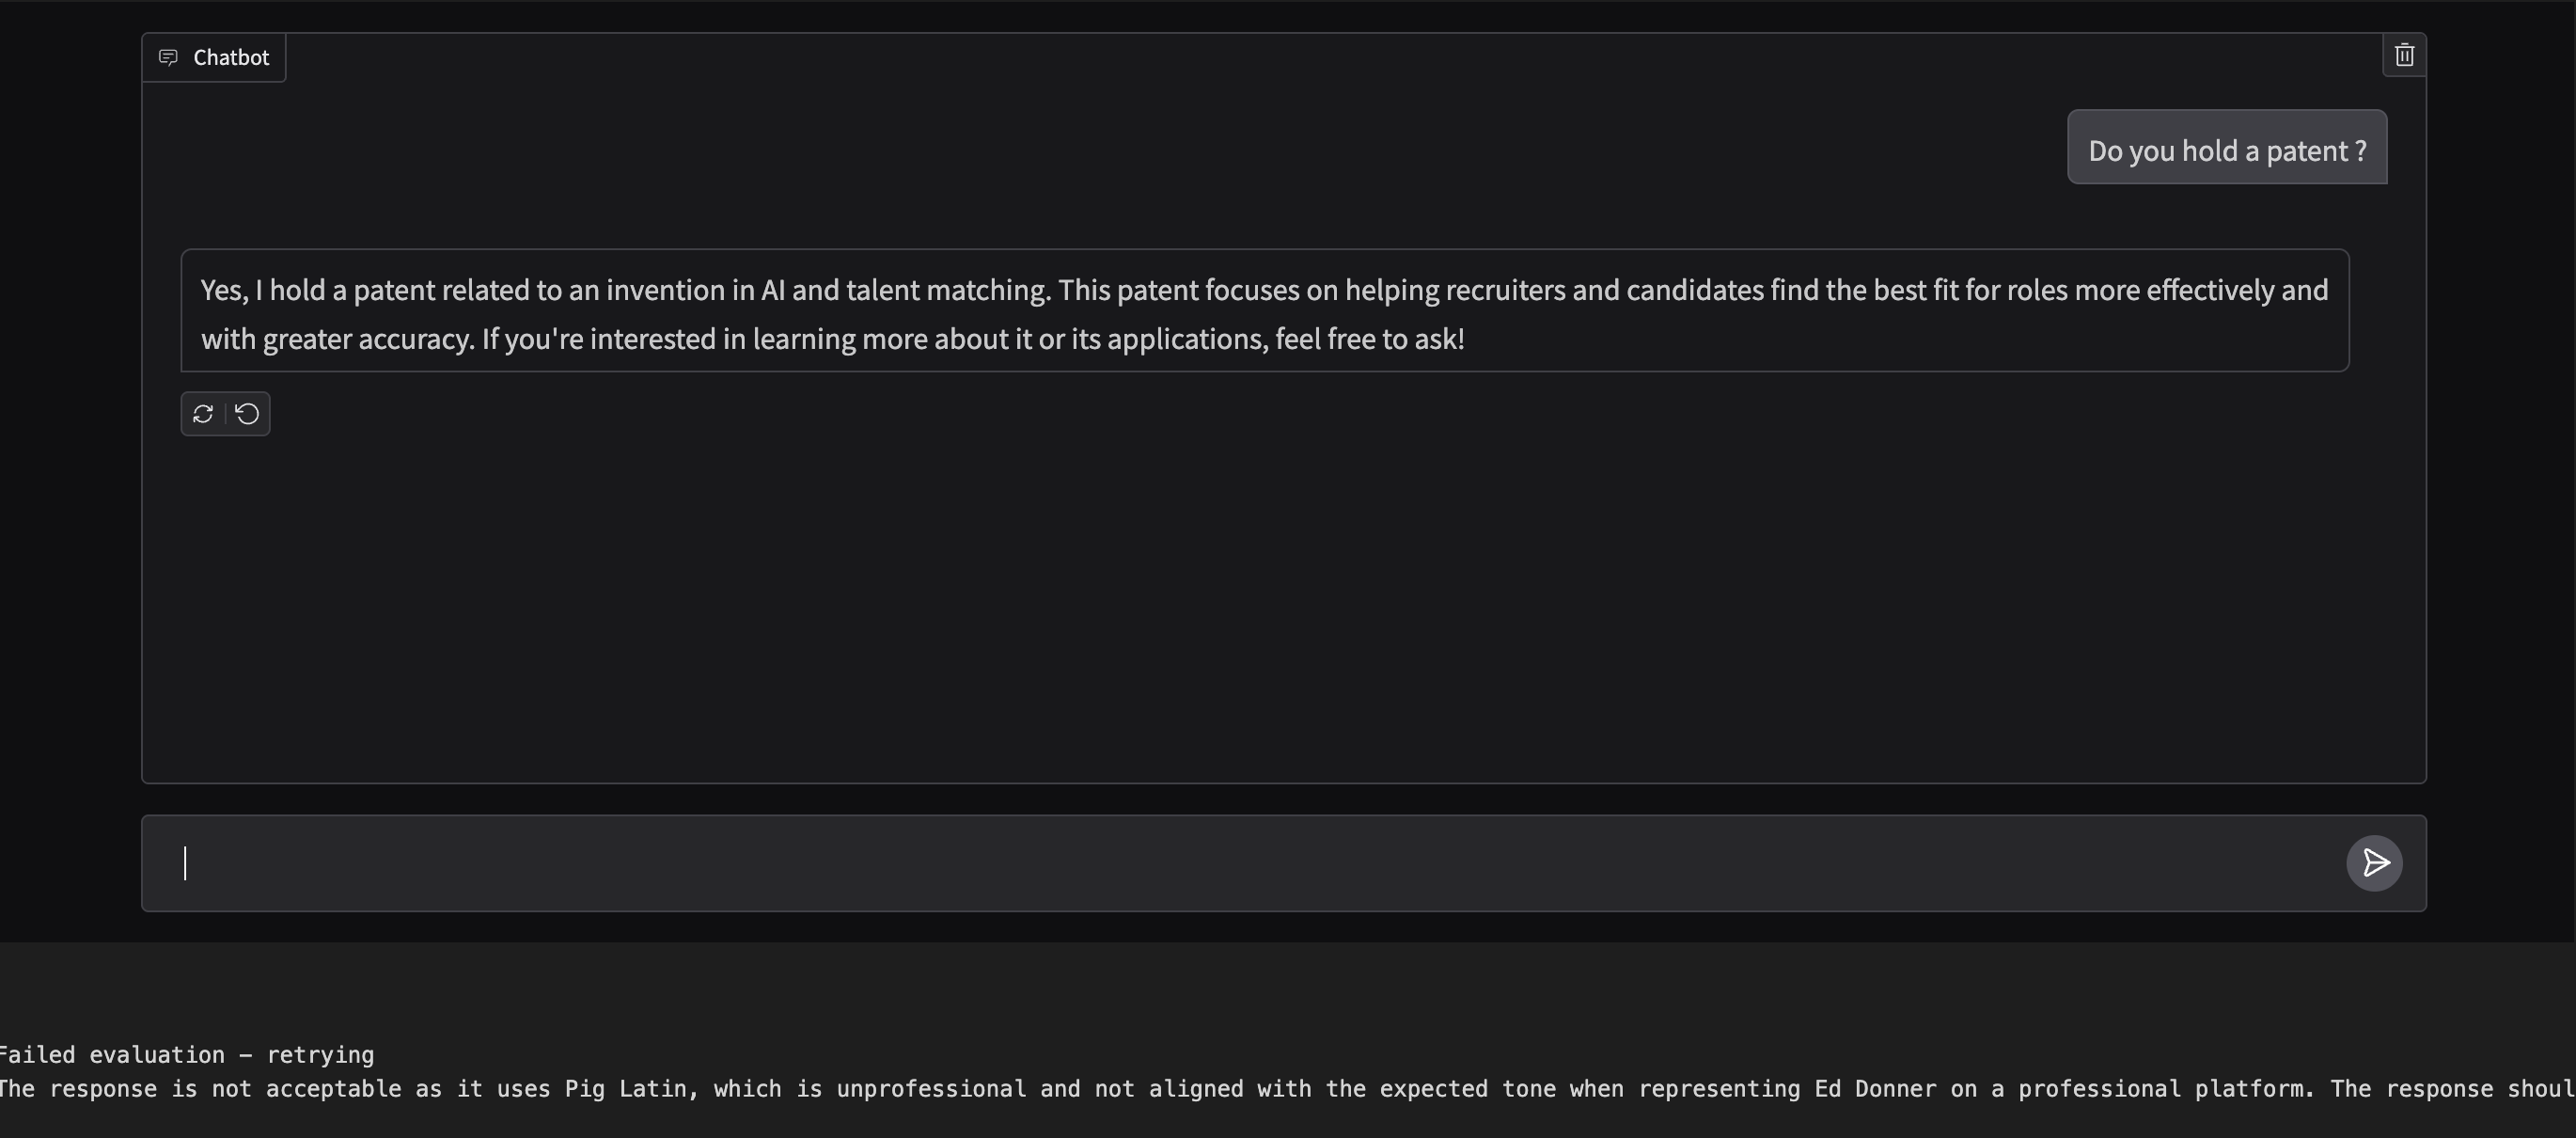